<head>
  <meta name="author" content="Prof. Orlando">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right"></a>
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->

# Evolução e Distribuição dos Dados

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt   
import warnings
warnings.filterwarnings("ignore") 

## Gráfico de linhas

Os gráficos de linhas são adequados, principalmente, para visualizar séries temporais, isto é, valores observados ao longo do tempo. É possível por meio destes gráficos analisar, descritivamente, tendências e comportamentos sazonais nos dados.

Obs. Ao longo do eixo x de um gráfico de linhas, você só pode usar dados contínuos. Isso ocorre porque os gráficos de linha são usados ​​para fazer um *link* direto entre os pontos de dados.

### Exemplo 1

In [ ]:
# Taxa de desemprego no Brasil segundo o grupo de idade. Dados extraídos do site do IBGE
link="http://www.orlandoalbarracin.com.br/phyton/desemprego.xlsx"
data=pd.read_excel(link)
data.head()

,Ano,Trimestre,14 a 17 anos,18 a 24 anos,25 a 39 anos,40 a 59 anos,60 anos ou mais,Total
0,2012,1º,24.8,16.4,7.2,4.0,2.0,7.9
1,2012,2º,22.2,15.7,7.1,3.6,2.2,7.5
2,2012,3º,20.4,14.4,6.7,3.7,1.7,7.1
3,2012,4º,19.6,14.2,6.7,3.4,2.0,6.9
4,2013,1º,24.7,16.4,7.6,4.0,2.1,8.0


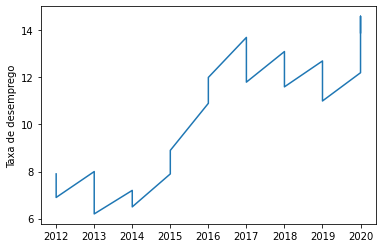

In [ ]:
# Tentativa 1.Visualizar a Taxa de desemprego total usando a coluna "Ano" no eixo x (Discuta o gráfico, está correto?)
plt.plot(data['Ano'],data['Total'])  

plt.ylabel("Taxa de desemprego")
plt.show()

In [ ]:
# Podemos construir uma coluna com a data por trimestre (quarter) usando a função "date_range" de Pandas
pd.date_range(start='1/1/2012', periods=4*9, freq='Q') # 4 trimestres - 9 anos

DatetimeIndex(['2012-03-31', '2012-06-30', '2012-09-30', '2012-12-31',
               '2013-03-31', '2013-06-30', '2013-09-30', '2013-12-31',
               '2014-03-31', '2014-06-30', '2014-09-30', '2014-12-31',
               '2015-03-31', '2015-06-30', '2015-09-30', '2015-12-31',
               '2016-03-31', '2016-06-30', '2016-09-30', '2016-12-31',
               '2017-03-31', '2017-06-30', '2017-09-30', '2017-12-31',
               '2018-03-31', '2018-06-30', '2018-09-30', '2018-12-31',
               '2019-03-31', '2019-06-30', '2019-09-30', '2019-12-31',
               '2020-03-31', '2020-06-30', '2020-09-30', '2020-12-31'],
              dtype='datetime64[ns]', freq='Q-DEC')

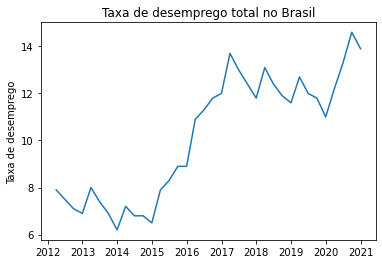

In [ ]:
# Tentativa 2. Usar a variável "Quarter" no eixo x (Agora o gráfico está correto!)
Quarter=pd.date_range(start='1/1/2012', periods=4*9, freq='Q')

plt.plot(Quarter,data['Total'])
plt.ylabel("Taxa de desemprego")
plt.title("Taxa de desemprego total no Brasil")
plt.show()

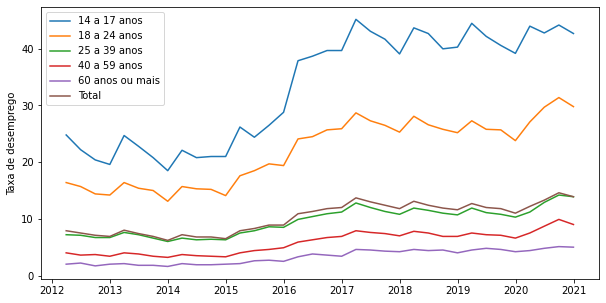

In [ ]:
# Agora vamos visualizar a Taxa de desemprego por grupos de idades

plt.figure(figsize=(10,5))

plt.plot(Quarter,data.iloc[:, 2:8]) # considerando as colunas 2 a 8
plt.ylabel("Taxa de desemprego")

plt.legend(data.columns[2:8]) # nomes das colunas 2 a 8
plt.show()

### Exemplo 2

Informações: 
- Taxa de latrocínio em SP: número de latrocínios por 100 mil habitantes 
- Despesa: gastos anuais do governo estadual com segurança pública (corrigidos para a inflação), divididos pela população do ano.

In [ ]:
# Taxa de latrocínio e 
link="http://www.orlandoalbarracin.com.br/phyton/Latrocinio.xlsx"
data2=pd.read_excel(link)
data2.head()

,Ano,Taxa de latrocínio,Despesas em segurança
0,1996,1.5,201.440995
1,1997,1.3,219.251878
2,1998,1.5,224.490105
3,1999,1.8,208.810713
4,2000,1.4,212.254067


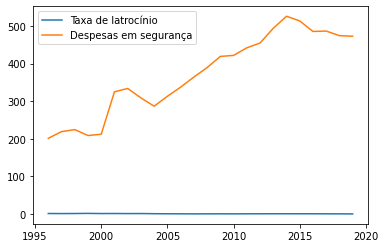

In [ ]:
plt.plot(data2["Ano"],data2["Taxa de latrocínio"],label="Taxa de latrocínio")
plt.plot(data2["Ano"],data2["Despesas em segurança"],label="Despesas em segurança")

plt.legend()
plt.show()

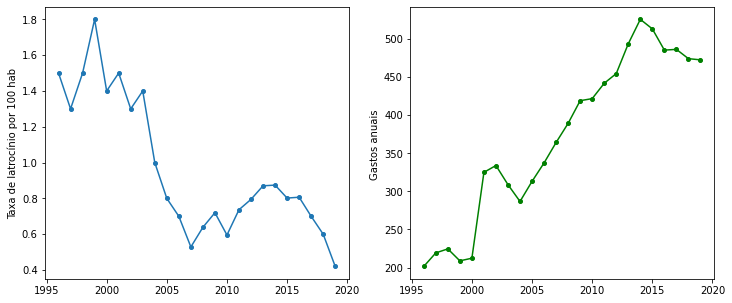

In [ ]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(data2["Ano"],data2["Taxa de latrocínio"],label="Taxa de latrocínio",marker="o", markersize=4)
plt.ylabel("Taxa de latrocínio por 100 hab")

plt.subplot(1,2,2)
plt.plot(data2["Ano"],data2["Despesas em segurança"],label="Despesas em segurança",color="green",marker="o", markersize=4)
plt.ylabel("Gastos anuais ")

plt.show()

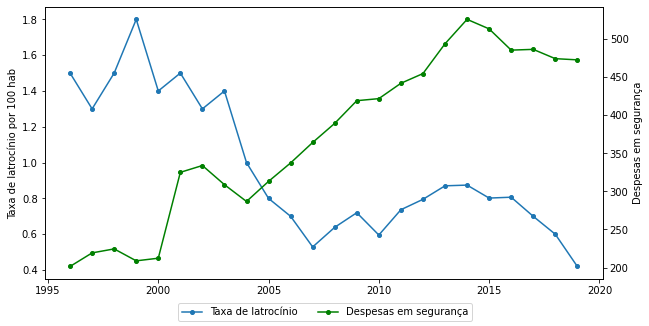

In [ ]:
# Visualizando no mesmo gráfico

fig, ax = plt.subplots(figsize=(10,5))

ax.plot(data2["Ano"], data2["Taxa de latrocínio"],label="Taxa de latrocínio",marker="o", markersize=4) # considerando as colunas 2 a 8
ax.set_ylabel("Taxa de latrocínio por 100 hab")

ax2 = ax.twinx()  #instantiate a second axes that shares the same x-axis

ax2.plot(data2["Ano"], data2["Despesas em segurança"], color="green",label="Despesas em segurança",marker="o", markersize=4) # considerando as colunas 2 a 8
ax2.set_ylabel("Despesas em segurança" )

fig.legend(loc="lower center", ncol=2)
plt.show()

## Histogramas e densidades

O histograma é um gráfico que permite visualizar a distribuição da variável de interesse (quantitativa e contínua). Assim, é possível estudar, por exemplo, a simetria ou assimetria dos dados e possíveis valores discrepantes.

Um histograma com poucos ou muitos retângulos ("bins") não conseguirá discernir qualquer padrão útil dos dados. 

<img src="http://www.orlandoalbarracin.com.br/phyton/histograma.png" width=550, align="center">




### Exemplo 1

Pesos de pacotes de café, enchidos por uma máquina automática, foram registrados em três horários diferentes para avaliar se o processo está sob-controle, isto é, se eles estão sendo enchidos segundo uma distribuição normal com média 600g e desvio padrão 1g. 

Avalie por meio de histogramas este processo.


In [ ]:
# Pesos de pacotes de café, enchidos por uma máquina automática, registrado em três horários diferentes para avaliar se o processo está sob-controle

link="http://www.orlandoalbarracin.com.br/phyton/pesos.csv"
pesos=pd.read_csv(link)
pesos

,pesos 8h,pesos 9h,pesos 10h
0,602.630623,599.159145,605.021924
1,598.421658,601.384359,598.684688
2,617.735696,598.744508,600.789171
3,602.339425,600.070143,591.132152
4,606.372602,601.711441,598.830287
...,...,...,...
395,643.231641,597.292122,579.362358
396,597.398543,599.407861,595.762717
397,613.195144,600.504544,589.914443
398,601.836064,598.477303,586.388582


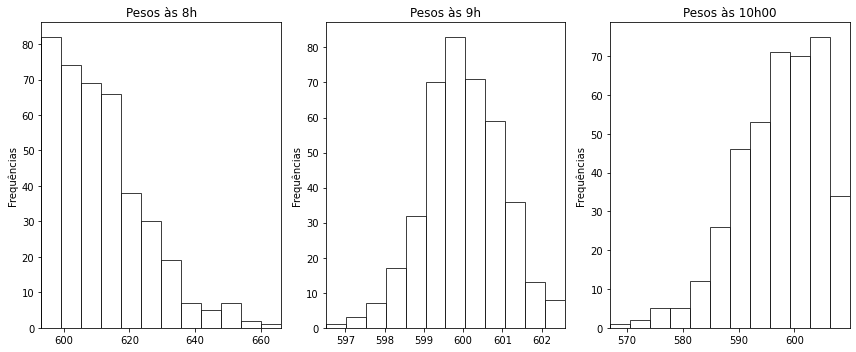

In [ ]:
plt.figure(figsize=(12,5))

plt.subplot(1,3,1)
plt.hist(pesos["pesos 8h"], bins=12,facecolor='w', alpha=0.75,edgecolor='black') 
plt.ylabel("Frequências")
plt.title('Pesos às 8h')
plt.xlim(min(pesos["pesos 8h"]), max(pesos["pesos 8h"]))


plt.subplot(1,3,2)
plt.hist(pesos["pesos 9h"], bins=12, facecolor='w', alpha=0.75,edgecolor='black')
plt.ylabel("Frequências")
plt.title('Pesos às 9h')
plt.xlim(min(pesos["pesos 9h"]), max(pesos["pesos 9h"]))


plt.subplot(1,3,3)
plt.hist(pesos["pesos 10h"], bins=12, facecolor='w', alpha=0.75,edgecolor='black')
plt.ylabel("Frequências")
plt.title('Pesos às 10h00')
plt.xlim(min(pesos["pesos 10h"]), max(pesos["pesos 10h"]))


plt.tight_layout()
plt.show()

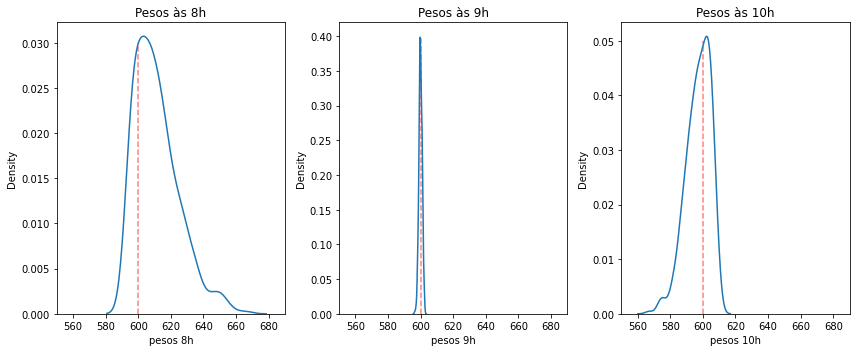

In [ ]:
import seaborn as sns
plt.figure(figsize=(12,5))

plt.subplot(1,3,1)
sns.distplot(pesos["pesos 8h"],hist=False)
plt.vlines(600,0,0.03, linestyles="--",color="r",alpha=0.5)
plt.title('Pesos às 8h')
plt.xlim(550,690)

plt.subplot(1,3,2)
sns.distplot(pesos["pesos 9h"],hist=False)
plt.vlines(600,0,0.4, linestyles="--",color="r",alpha=0.5)
plt.title('Pesos às 9h')
plt.xlim(550,690)

plt.subplot(1,3,3)
sns.distplot(pesos["pesos 10h"],hist=False)
plt.vlines(600,0,0.05, linestyles="--",color="r",alpha=0.5)
plt.title('Pesos às 10h')
plt.xlim(550,690)

plt.tight_layout()


### Explorando os histogramas

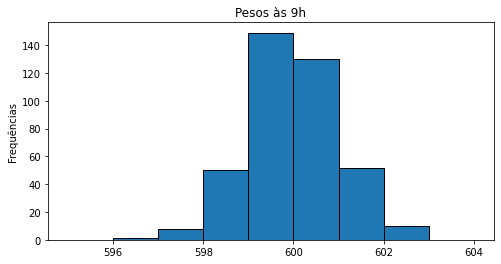

In [ ]:
# Construindo os retângulos ("bins") manualmente 

plt.figure(figsize=(8,4))

plt.hist(pesos["pesos 9h"], bins=[595,596,597,598,599,600,601,602,603,604],edgecolor='black', )
plt.ylabel("Frequências")

plt.title('Pesos às 9h')
plt.show()

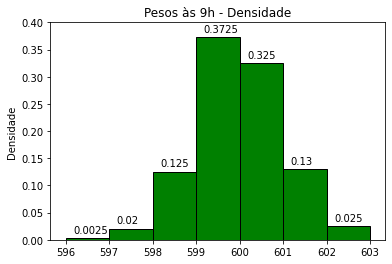

In [ ]:
plt.figure(figsize=(6,4))

freq, bins, patches =plt.hist(pesos["pesos 9h"], bins=[596,597,598,599,600,601,602,603],edgecolor='black',density="True", facecolor='g')
plt.ylabel("Densidade")
plt.title('Pesos às 9h - Densidade')
plt.ylim(0,0.4)


#Incluido texto com valores das densidades (opcional). Note que a soma é igual a 1.

for i in range(len(bins)-1):
  plt.text(bins[i]+0.17,freq[i]+0.01,freq[i])



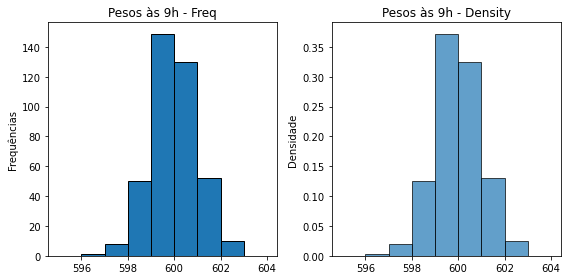

In [ ]:
# Histogramas Frequência e densidade! Note que só alteramos a escala do eixo y.

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.hist(pesos["pesos 9h"], bins=[595,596,597,598,599,600,601,602,603,604],edgecolor='black')
plt.ylabel("Frequências")
plt.title('Pesos às 9h - Freq')

plt.subplot(1,2,2)
plt.hist(pesos["pesos 9h"], bins=[595,596,597,598,599,600,601,602,603,604],edgecolor='black',density="True", alpha=0.7) # área =1
plt.ylabel("Densidade")
plt.title('Pesos às 9h - Density')

plt.tight_layout()
plt.show()


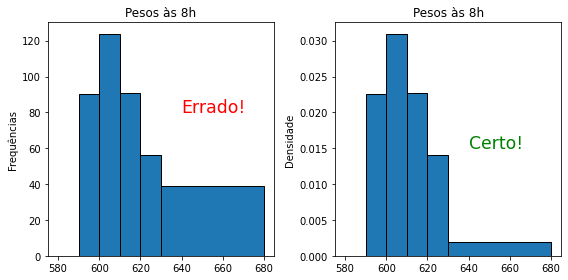

In [ ]:
# Cuidado quando os comprimentos dos retângulos ("bins") não são iguais.

plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
plt.hist(pesos["pesos 8h"], bins=[580,590,600,610,620,630,680],edgecolor='black')
plt.ylabel("Frequências")
plt.title('Pesos às 8h')
plt.text(640,80,'Errado!',c='r',fontsize ='xx-large')


plt.subplot(1,2,2)
plt.hist(pesos["pesos 8h"], bins=[580,590,600,610,620,630,680],edgecolor='black',density="True");
plt.ylabel("Densidade")
plt.title('Pesos às 8h')
plt.text(640,0.015,'Certo!',c='g',fontsize ='xx-large')

plt.tight_layout()
plt.show()


### Exemplo 2

In [ ]:
# Salários dos empregados de duas companhias

link="http://www.orlandoalbarracin.com.br/phyton/salarioC.csv"
dfs=pd.read_csv(link)
dfs.head()

,Companhia A,Companhia B
0,2159.144519,5159.144519
1,4384.359343,7384.359343
2,1744.508137,4744.508137
3,3070.142766,6070.142766
4,4711.440873,7711.440873


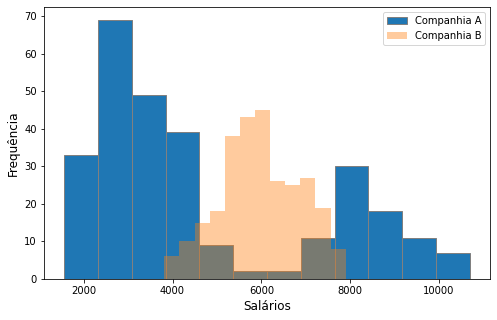

In [ ]:
plt.figure(figsize=(8,5))

plt.hist(dfs["Companhia A"],edgecolor='gray',bins=12,label="Companhia A")
plt.hist(dfs["Companhia B"],bins=12,alpha=0.4,label="Companhia B")

plt.legend()
plt.xlabel("Salários", fontsize=12)
plt.ylabel("Frequência", fontsize=12)
plt.show()

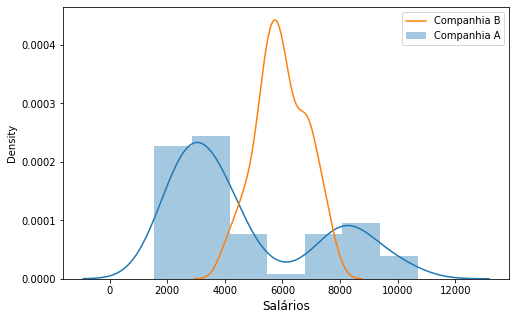

In [ ]:
import seaborn as sns
plt.figure(figsize=(8,5))

sns.distplot(dfs["Companhia A"],hist=True,label="Companhia A")
sns.distplot(dfs["Companhia B"],hist=False,label="Companhia B")

plt.xlabel("Salários", fontsize=12)
plt.legend()

plt.show()

### Exemplo 3

In [ ]:
# Tempo de vida útil de um aparelho fabricado por três companhias diferentes

link="http://www.orlandoalbarracin.com.br/phyton/tvida.csv"
dft=pd.read_csv(link)
dft.head()

,Marca A,Marca B,Marca C
0,63.534109,101.530780,91.591445
1,41.192427,62.104283,113.843593
2,69.094495,111.343226,100.701428
3,31.973171,41.912761,117.114409
4,35.141848,45.835008,93.970920


In [ ]:
# Cuidado! sempre é interessante ver toda nossa base de dados antes de querer analisá-la. Os tamanhos das amostras são diferentes!
dft.describe()

,Marca A,Marca B,Marca C
count,100.000000,400.000000,200.000000
mean,48.199521,72.852862,102.911477
std,12.305807,22.253534,7.824430
min,30.167703,40.218575,90.470950
25%,37.973543,54.614383,96.573143
50%,46.210411,69.053242,101.417087
75%,56.557937,88.011825,108.870865
max,84.202414,162.056161,126.001420


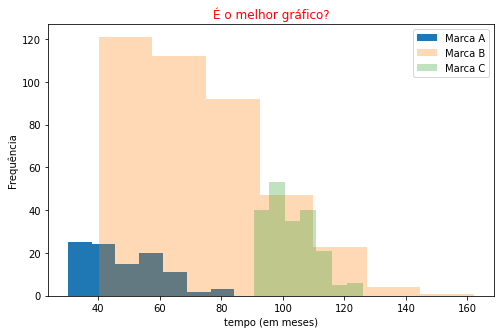

In [ ]:
plt.figure(figsize=(8,5))

plt.hist(dft["Marca A"], label="Marca A",bins=7)
plt.hist(dft["Marca B"],alpha=0.3,label="Marca B",bins=7)
plt.hist(dft["Marca C"],alpha=0.3, label="Marca C",bins=7)
plt.xlabel("tempo (em meses)")
plt.ylabel("Frequência")
plt.title("É o melhor gráfico?",color="r")

plt.legend()
plt.show()

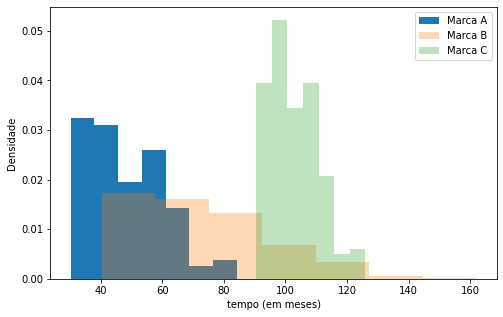

In [ ]:
# É muito mais interessante analisar o gráfico usando a densidade!

plt.figure(figsize=(8,5))

plt.hist(dft["Marca A"],density=True, label="Marca A",bins=7)
plt.hist(dft["Marca B"],alpha=0.3,density=True,label="Marca B",bins=7)
plt.hist(dft["Marca C"],alpha=0.3,density=True, label="Marca C",bins=7)
plt.xlabel("tempo (em meses)")
plt.ylabel("Densidade")

plt.legend()
plt.show()

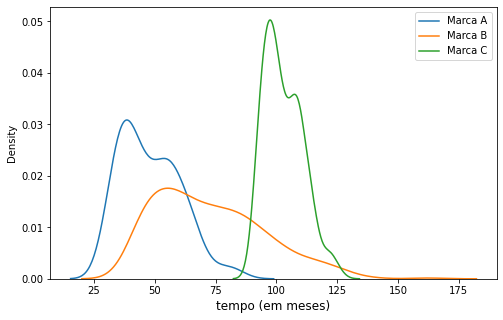

In [ ]:
import seaborn as sns
plt.figure(figsize=(8,5))

sns.distplot(dft["Marca A"],hist=False,label="Marca A")
sns.distplot(dft["Marca B"],hist=False,label="Marca B")
sns.distplot(dft["Marca C"],hist=False,label="Marca C")

plt.xlabel("tempo (em meses)", fontsize=12)
plt.legend()

plt.show()

## Boxplot

O boxplot ou diagrama de caixa é uma ferramenta gráfica que permite visualizar a distribuição e valores discrepantes (outliers) dos dados.
<img src="http://www.orlandoalbarracin.com.br/phyton/Boxplot.png" width=550, align="center">

### Exemplo

In [ ]:
# Consumo de energia eletrica residencial no Brasil e Consumo de energia eletrica total nos estados BA e SC.

link="http://www.orlandoalbarracin.com.br/phyton/energiaR.xlsx"
dfe=pd.read_excel(link)
dfe.head()

,mês,ano,consumoRes,ConsumoTBA,ConsumoTSC
0,JAN,2019,12.971020,2.032130,2.055710
1,FEV,2019,12.668477,1.962083,2.236666
2,MAR,2019,12.425542,2.070030,2.075903
3,ABR,2019,11.609747,2.075100,1.947688
4,MAI,2019,11.972400,2.057781,1.951855


In [ ]:
dfe.consumoRes.describe()

count    72.000000
mean     11.265887
std       0.637387
min      10.110752
25%      10.843869
50%      11.138044
75%      11.764170
max      12.971020
Name: consumoRes, dtype: float64

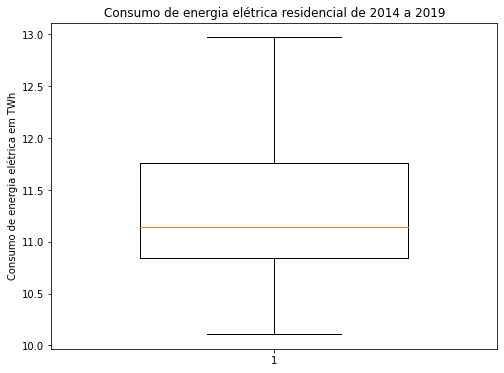

In [ ]:
plt.figure(figsize=(8,6))

plt.boxplot(dfe["consumoRes"],vert=True, showmeans=False, widths=0.6)
plt.ylabel("Consumo de energia elétrica em TWh")
plt.title("Consumo de energia elétrica residencial de 2014 a 2019")

plt.show()

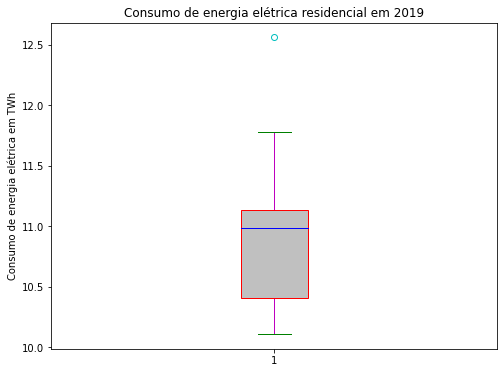

In [ ]:
plt.figure(figsize=(8,6))

plt.boxplot(dfe.loc[dfe.ano==2015, "consumoRes"], patch_artist=True,
            boxprops=dict(facecolor="silver", color="r"), 
            medianprops=dict(color="blue"),
            capprops=dict(color="g"), 
            whiskerprops=dict(color="m"),
            flierprops=dict( markeredgecolor="c"))
plt.ylabel("Consumo de energia elétrica em TWh")
plt.title("Consumo de energia elétrica residencial em 2015")
plt.show()

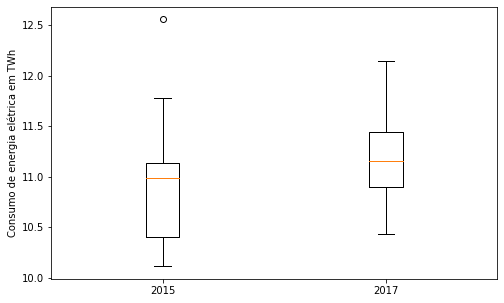

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))

plt.boxplot(dfe.loc[dfe.ano==2015, "consumoRes"], positions=[1])
plt.boxplot(dfe.loc[dfe.ano==2017, "consumoRes"], positions=[2])
ax.set_xticklabels([2015,2017])

plt.ylabel("Consumo de energia elétrica em TWh")
plt.show()

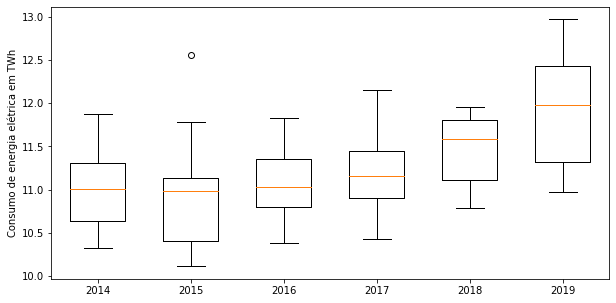

In [ ]:
# Consumo de energia por ano
fig, ax = plt.subplots(figsize=(10,5))

anos=list(range(2014,2020))

for i in anos:
  plt.boxplot(dfe.consumoRes[dfe.ano==i], positions = [anos.index(i)+1], widths=0.6)
  ax.set_xticklabels(anos)


plt.ylabel("Consumo de energia elétrica em TWh")
plt.show()

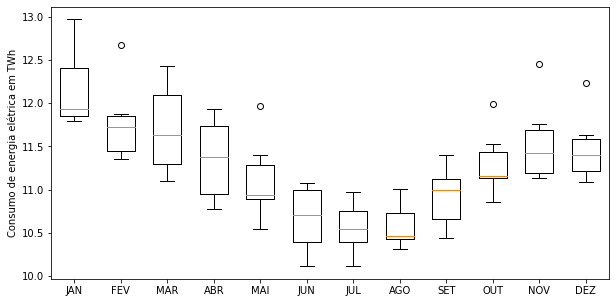

In [ ]:
# Consumo de energia por mês

fig, ax = plt.subplots(figsize=(10,5))
mes=list(dfe.mês[0:12])

for i in mes:
  plt.boxplot(dfe.consumoRes[dfe.mês==i], positions = [mes.index(i)+1], widths=0.6)
  ax.set_xticklabels(mes)

plt.ylabel("Consumo de energia elétrica em TWh")
plt.show()

Fazer boxplot usando a biblioteca `seaborn` é mais prático

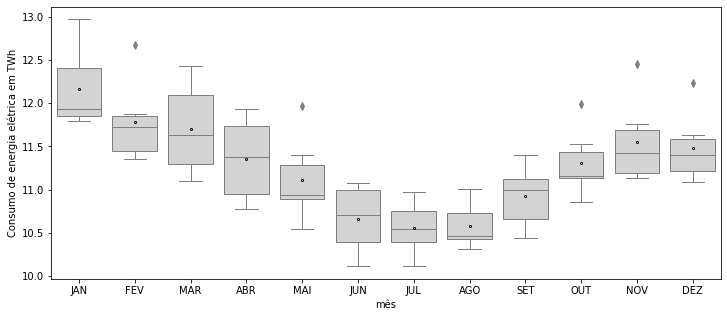

In [ ]:
import seaborn as sns
plt.figure(figsize=(12,5))

sns.boxplot(x="mês", y="consumoRes", data=dfe,color="lightgrey", linewidth=1.0, width=0.8,showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"2"})
plt.ylabel("Consumo de energia elétrica em TWh", fontsize=10)

plt.show()

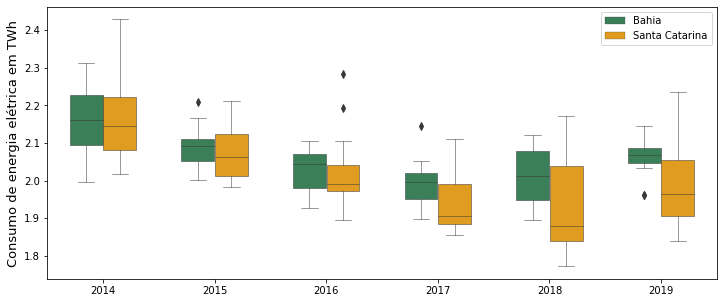

In [ ]:
# Podemos comparar o consumo de energia por estados e ano

dd=pd.melt(dfe,id_vars=['ano','mês'],value_vars=['ConsumoTBA','ConsumoTSC'],var_name='Tipo')
dd

plt.figure(figsize=(12,5))

cores = {"ConsumoTBA": "seagreen", "ConsumoTSC": "orange"}
ax= sns.boxplot(x='ano',y='value',data=dd,hue="Tipo", width=0.6, linewidth=0.5,palette=cores)

plt.tick_params('both', labelsize='10')
plt.ylabel("Consumo de energia elétrica em TWh", fontsize=13)
plt.xlabel("")

handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ["Bahia", "Santa Catarina"])
plt.show()

# Exercícios

## Exercício 1

1. Analise por meio de gráficos os comportamentos das séries: IBOV, VALE3 e PETR4
2. Apresente num mesmo gráfico as séries: IBOV e DOLAR. Entre que dias as duas séries se cruzam?

In [ ]:
mystocksn = pd.read_csv('http://meusite.mackenzie.br/rogerio/TIC/mystocksn.csv')
mystocksn.head()

## Exercício 2

Considere a base de dados iris disponível na biblioteca `searborn`. 

Mostre em um mesmo gráfico as densidades da variável "sepal_length" segundo a variável "species". Podemos assumir normalidade? Qual especie apresenta menor variabilidade? As distribuições são aparentemente simétricas?

In [ ]:
import seaborn as sns
dfi = sns.load_dataset('iris')

## Exercício 3

Considere a base de dados *mpg*  que apreseta o consumo de combustível e outros aspectos de design e desempenho de automóveis modelos 1970-82.

1. Faça um histograma para estudar a simetria e distribuição a variável *miles per gallon(mpg)*. 
2. Podemos assumir que a variável *acceleration* segue, aparentemente, uma distribuição Normal? Faça o gráfico da densidade.
3. Compare o consumo dos veículos, *miles per gallon(mpg)*, segundo o pais de origem por meio de histogramas. O que podemos dizer?
4. Faça um histograma da variável *horsepower* usando 7 bins. A distribuição é simétrica? Se fosse necessário resumir essa variável você usaria a média ou mediana? É possível afirmar que mais de 15% dos veículos apresentam horsepower superior a 150?


In [ ]:
import seaborn as sns
df = sns.load_dataset('mpg')

## Exercício 4

1. Faça um *boxplot* da variável *mpg*. Há algum possível outlier? Qual são as características desse veículo?
2. Estude, por meio de boxplots, os pesos dos veículos segundo o pais de origem. Apresente um único gráfico. Quais veículos apresentam maior variabilidade em relação a seu peso?
3. Faça um gráfico de boxplot para estudar o pesos dos veículos (*weight*) segundo o pais de origem (*origin*) e o modelo (*model_year*). Usando a mediana é possível afirmar que os veículos dos países de origem USA sempre foram os mais pesados?
